# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
import missingno as msno

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Data Dictionary

> `Bangkok_Housing_Price_train.json`

- 22,316 records

|**column**|**data type**|**description**|
|:-:|:-:|:-:|
|id|int|ID of selling item|
|province|string|province name: this dataset only includes **Bangkok**,**Samut Prakan** and **Nonthaburi** |
|district|string|district name|
|subdistrict|string|subdtistrict name|
|address|string|address e.g. Street name|
|property_type|string|type of the house: **Condo**, **Townhouse** or **Detached House**|
|total_units|float|the humber of rooms/houses that the condo/village has|
|bedrooms|int|the number of bedrooms|
|baths|int|the number of baths|
|floor_area|float|total area of inside floor [㎡]|
|floor_level|int|floor level of the room |
|land_area|float|total area of the land [㎡]|
|latitude|float|latitude of the house|
|longitude|float|longitude of the house|
|nearby_stations|int|the number of nearby stations (within 1km)|
|nearby_station_distance|list|list of (station name, distance[m]). Each station name consists of **station ID**, **station name**, and **Line** such as *"E4 Asok BTS"*|
|nearby_bus_stops|int|the number of nearby bus stops|
|nearby_supermarkets|int|the number of nearby supermarkets|
|nearby_shops|int|the number of nearby shops|
|year_built|int|year built|
|month_built|string|month built: January-December|
|price|float|**[TARGET VALUE]** selling price|


# 1. load data

In [2]:
df = pd.read_json('data/Bangkok_Housing_Price.json')
df

id province      district      subdistrict  \
0      10918106  Bangkok  Phra Khanong        Bang Chak   
1      11007770  Bangkok  Phra Khanong        Bang Chak   
2      10905108  Bangkok   Khlong Toei     Phra Khanong   
3      11007324  Bangkok   Khlong Toei      Khlong Toei   
4      10975023  Bangkok       Bang Na          Bang Na   
...         ...      ...           ...              ...   
22311  11006385  Bangkok  Phra Khanong        Bang Chak   
22312  10953249  Bangkok      Bang Rak     ASHTON Silom   
22313  10582611  Bangkok  Phra Khanong        Bang Chak   
22314  10582665  Bangkok      Watthana  Khlong Tan Nuea   
22315  10582645  Bangkok      Watthana  Khlong Tan Nuea   

                                  address property_type  total_units  \
0                     2097 Sukhumvit Road         Condo        940.0   
1                    Sukhumvit 101/1 Road         Condo        347.0   
2                4866-4878 Sukhumvit Road         Condo        383.0   
3                  204-206 Sukhumvit Road         Condo        140.0   
4                     2952 Sukhumvit Road         Condo        421.0   
...                                   ...           ...          ...   
22311             3009 Sukhumvit 101 Road         Condo        778.0   
22312                      166 Silom Road         Condo        428.0   
22313    Soi Sukhumvit 52, Sukhumvit Road         Condo        154.0   
22314  Soi Thonglor 23, Sukhumvit 55 Road         Condo         52.0   
22315                   338 Thonglor Road         Condo        148.0   

       bedrooms  baths  floor_area  ...   longitude  nearby_stations  \
0           1.0    1.0          30  ...  100.602498                2   
1           1.0    1.0          24  ...  100.624614                0   
2           1.0    1.0          42  ...  100.592335                1   
3           2.0    2.0          70  ...  100.560901                2   
4           2.0    2.0          63  ...  100.608607                1   
...         ...    ...         ...  ...         ...              ...   
22311       1.0    1.0          32  ...  100.608305                2   
22312       2.0    2.0          86  ...  100.526875                3   
22313       2.0    2.0          55  ...  100.599316                2   
22314       3.0    3.0         138  ...  100.580168                0   
22315       2.0    2.0          82  ...  100.582403                0   

                                 nearby_station_distance  nearby_bus_stops  \
0       [[E9 On Nut BTS, 190], [E10 Bang Chak BTS, 880]]               NaN   
1                                                   None               3.0   
2                           [[E8 Phra Khanong BTS, 270]]               NaN   
3      [[BL23 Queen Sirikit National Convention Centr...               NaN   
4                              [[E12 Udom Suk BTS, 150]]               NaN   
...                                                  ...               ...   
22311  [[E11 Punnawithi BTS, 360], [E10 Bang Chak BTS...               NaN   
22312  [[S3 Chong Nonsi BTS, 480], [S4 Saint Louis BT...               NaN   
22313   [[E9 On Nut BTS, 300], [E10 Bang Chak BTS, 910]]               NaN   
22314                                               None              20.0   
22315                                               None              20.0   

       nearby_supermarkets nearby_shops  year_built  month_built  \
0                      6.0           11        2013     December   
1                      7.0            5        2015     February   
2                     20.0           17        2015     February   
3                     13.0           20        2011         July   
4                     12.0           14        2011     February   
...                    ...          ...         ...          ...   
22311                  9.0           12        2020      January   
22312                 20.0           20        2018     November   
22313                  7.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22316 entries, 0 to 22315
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       22316 non-null  int64  
 1   province                 22316 non-null  object 
 2   district                 22316 non-null  object 
 3   subdistrict              22288 non-null  object 
 4   address                  22316 non-null  object 
 5   property_type            22316 non-null  object 
 6   total_units              16602 non-null  float64
 7   bedrooms                 22249 non-null  float64
 8   baths                    22258 non-null  float64
 9   floor_area               22316 non-null  int64  
 10  floor_level              11991 non-null  float64
 11  land_area                7846 non-null   float64
 12  latitude                 22316 non-null  float64
 13  longitude                22316 non-null  float64
 14  nearby_stations       

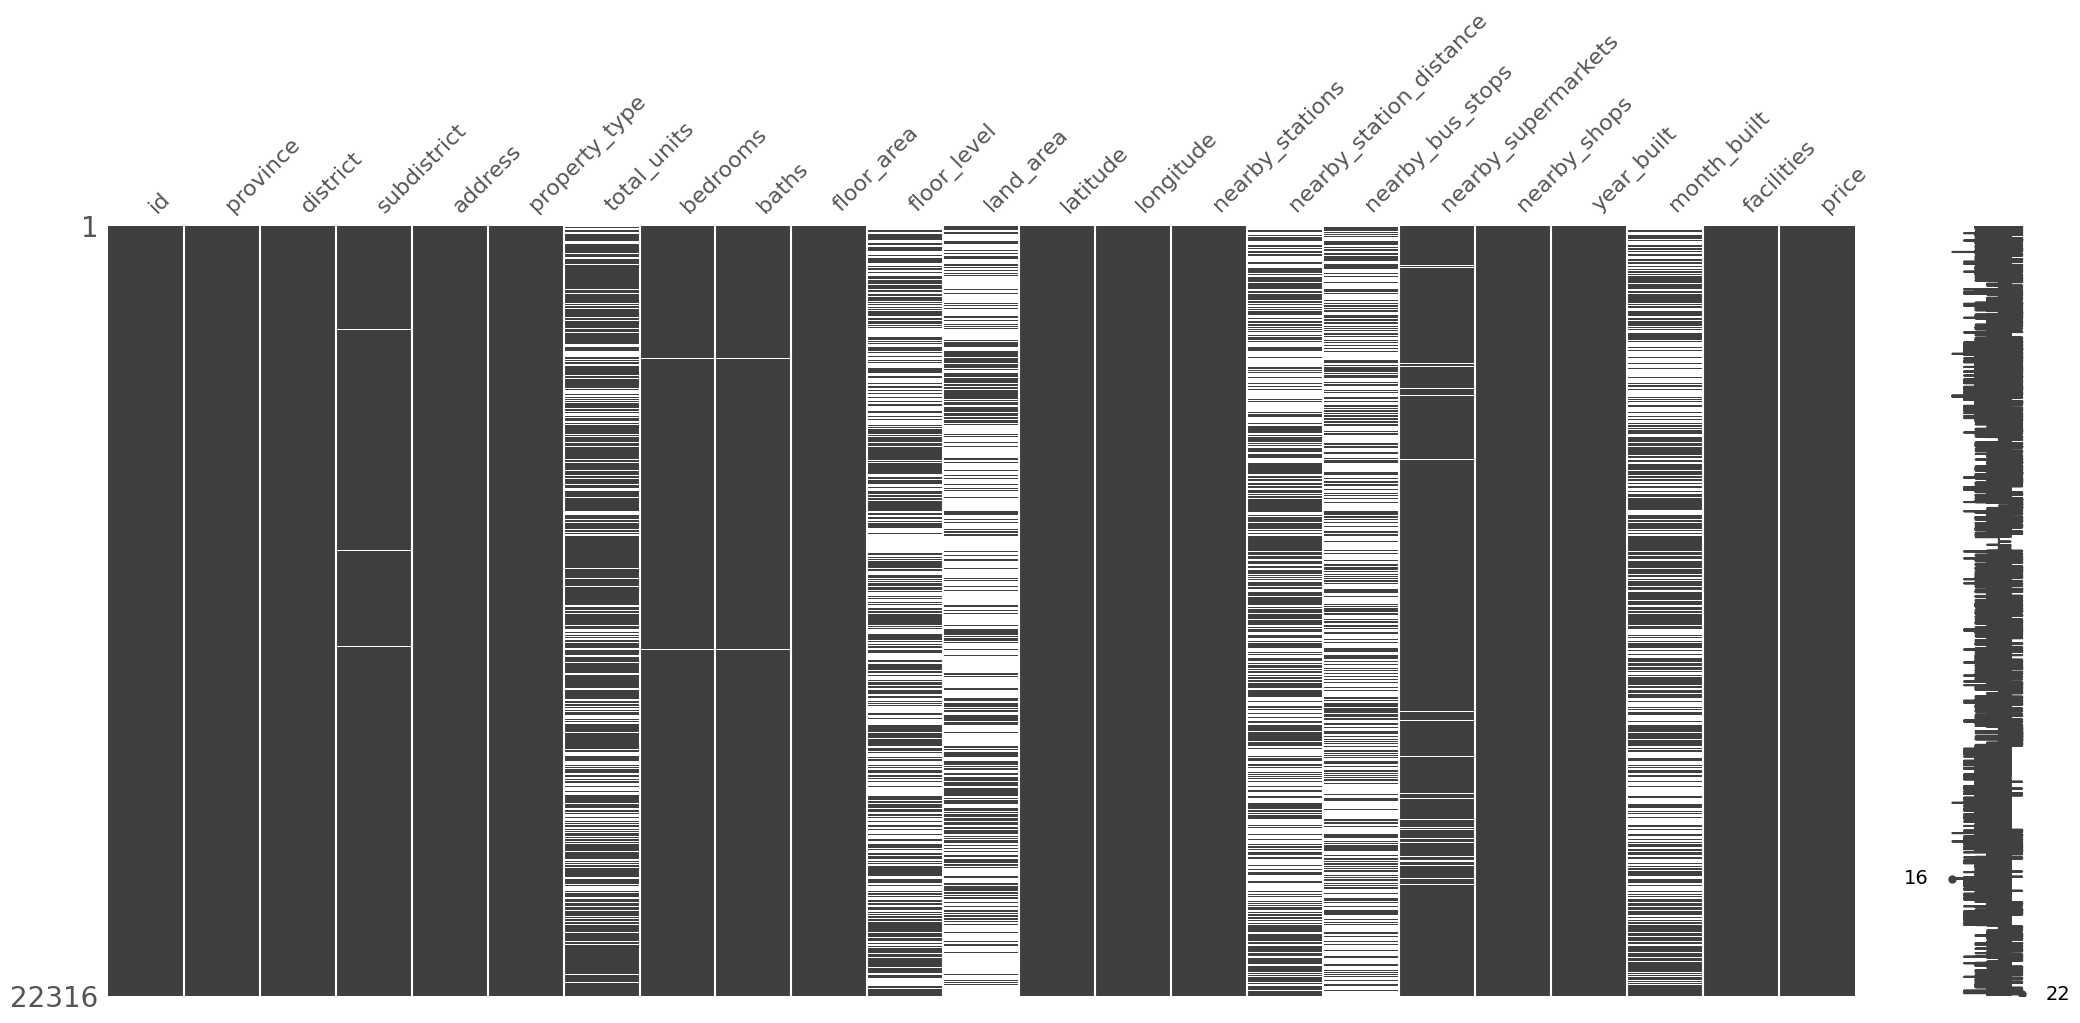

In [4]:
msno.matrix(df);

In [5]:
df.describe()

id   total_units      bedrooms         baths    floor_area  \
count  2.231600e+04  16602.000000  22249.000000  22258.000000  22316.000000   
mean   1.061965e+07    629.526382      2.089622      1.917243    106.034280   
std    8.080599e+05    537.157659      1.194710      1.154653    101.919122   
min    6.845360e+05      1.000000      1.000000      0.000000      1.000000   
25%    1.063278e+07    250.000000      1.000000      1.000000     35.000000   
50%    1.086764e+07    468.000000      2.000000      2.000000     64.000000   
75%    1.097657e+07    866.000000      3.000000      2.000000    144.000000   
max    1.104790e+07   4000.000000     10.000000      9.000000    868.000000   

        floor_level      land_area      latitude     longitude  \
count  11991.000000    7846.000000  22316.000000  22316.000000   
mean      12.045618     312.170788     13.758510    100.566195   
std        9.648856    3197.338577      0.086350      0.085015   
min        1.000000      12.000000     13.517062    100.052922   
25%        4.000000      88.000000     13.710965    100.522103   
50%        9.000000     168.000000     13.743171    100.568408   
75%       18.000000     272.000000     13.821944    100.607109   
max       59.000000  176000.000000     14.095025    100.905485   

       nearby_stations  nearby_bus_stops  nearby_supermarkets  nearby_shops  \
count     22316.000000       9100.000000         21717.000000  22316.000000   
mean          1.054445         14.043187             9.645347     11.302160   
std           1.134489          6.551948             5.652540      7.182034   
min           0.000000          1.000000             1.000000      1.000000   
25%           0.000000          8.000000             5.000000      4.000000   
50%           1.000000         17.000000             9.000000     10.000000   
75%           2.000000         20.000000            14.000000     20.000000   
max           3.000000         20.000000            20.000000     20.000000   

         year_built         price  
count  22316.000000  2.231600e+04  
mean    1423.221366  8.212486e+06  
std      917.472440  9.450663e+06  
min        0.000000  4.500000e+05  
25%        0.000000  2.600000e+06  
50%     2013.000000  4.700000e+06  
75%     2017.000000  9.332500e+06  
max     2023.000000  5.990000e+07

# 2. EDA

In [6]:
df.dropna(subset=['bedrooms', 'baths', 'nearby_supermarkets'], inplace=True) # drop some rows with missing value

## distribution of price

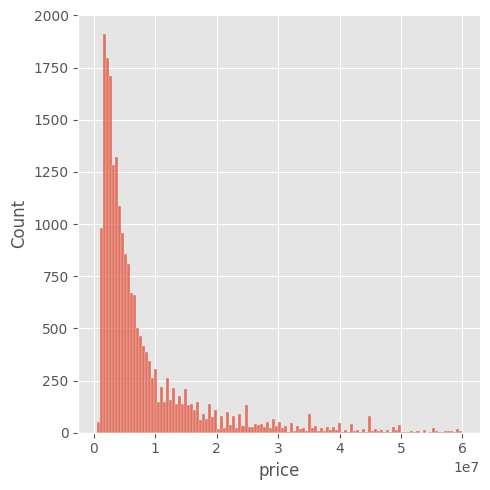

In [7]:
sns.displot(df['price']); # highly right skewed

## correlations

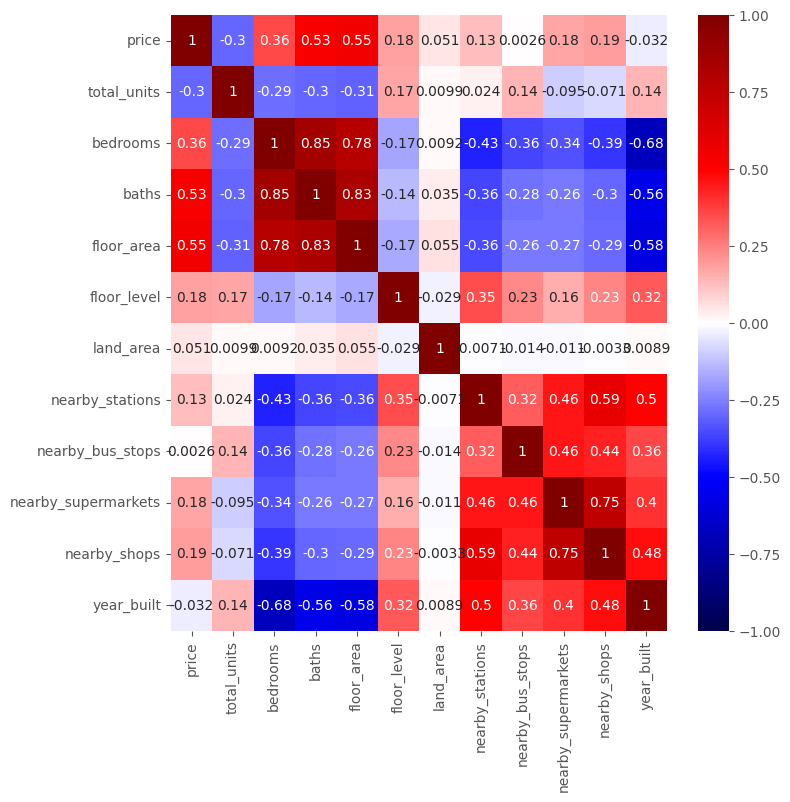

In [8]:
numeric_columns = [
    'price',
    'total_units',
    'bedrooms',
    'baths',
    'floor_area',
    'floor_level',
    'land_area',
    'nearby_stations',
    'nearby_bus_stops',
    'nearby_supermarkets',
    'nearby_shops',
    'year_built'
]

plt.figure(figsize=(8,8))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic');

## categorical features

- `property_type`
- `province`
- `district`
- `subdistrict`
- `address`
- `nearby_station_distance` (pair of [station name, distance])

#### Countplot

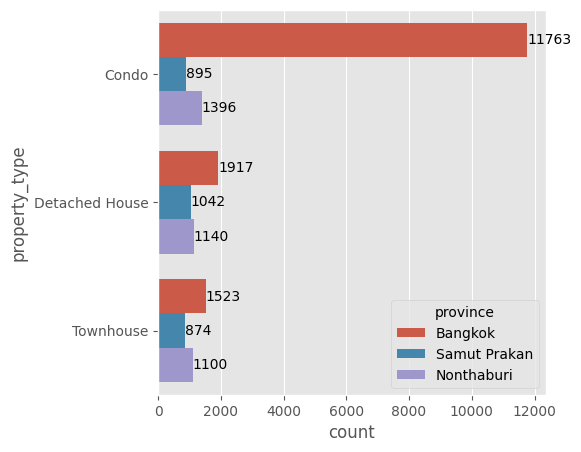

In [9]:
## privince & property type

plt.figure(figsize=(5,5))
ax = sns.countplot(y='property_type', hue="province", data=df)
for i in range(3):
    ax.bar_label(ax.containers[i])

number of districts : 58


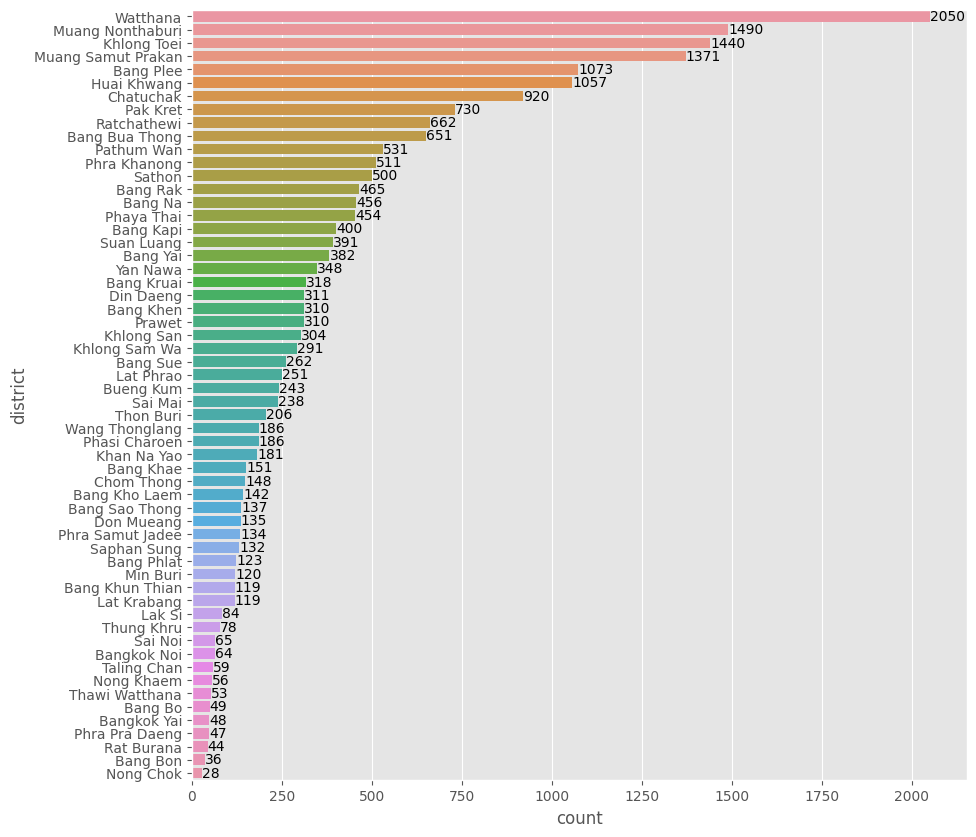

In [10]:
## district

print('number of districts :', df.district.nunique())

plt.figure(figsize=(10,10))
order = df['district'].value_counts().index
ax = sns.countplot(y='district', data=df, order=order)
ax.bar_label(ax.containers[0]);

#### price vs property type

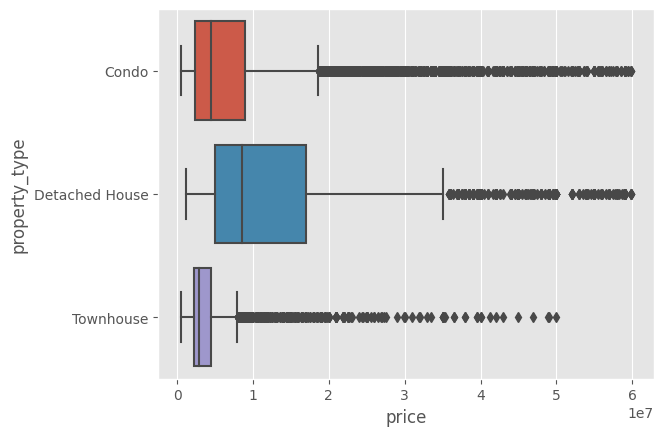

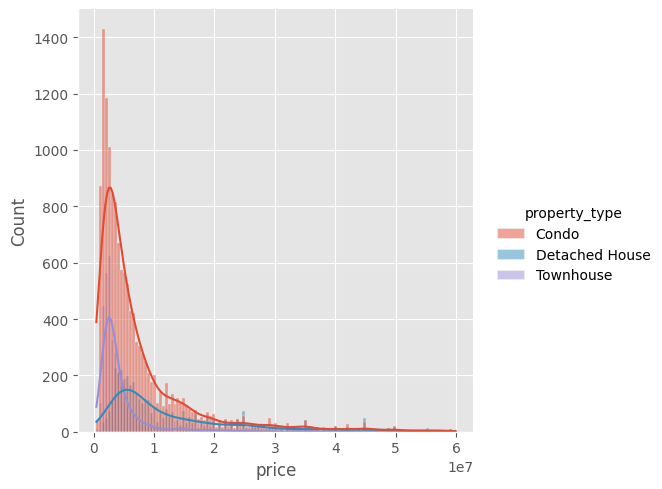

In [11]:
sns.boxplot(x="price", y='property_type', data=df)
sns.displot(x="price", hue='property_type', kde=True, data=df);

#### price vs province

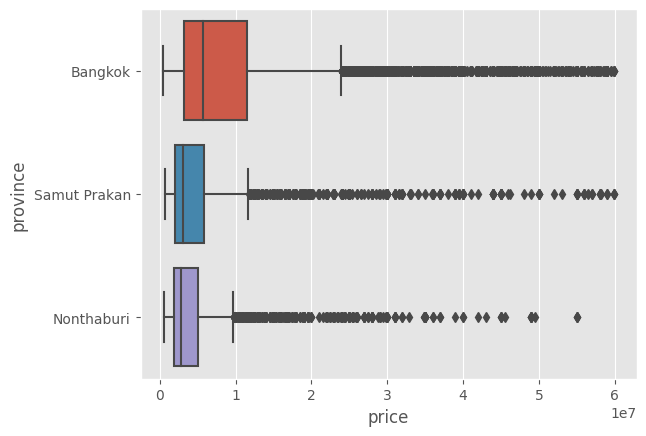

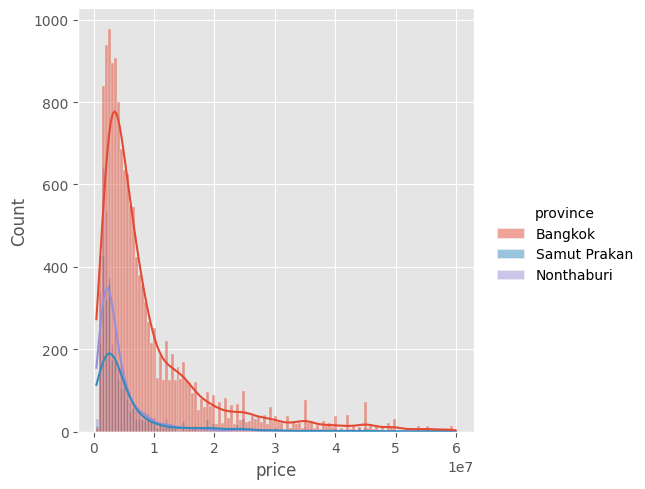

In [12]:
sns.boxplot(x="price", y='province', data=df)
sns.displot(x="price", hue='province', kde=True, data=df);

#### price vs district

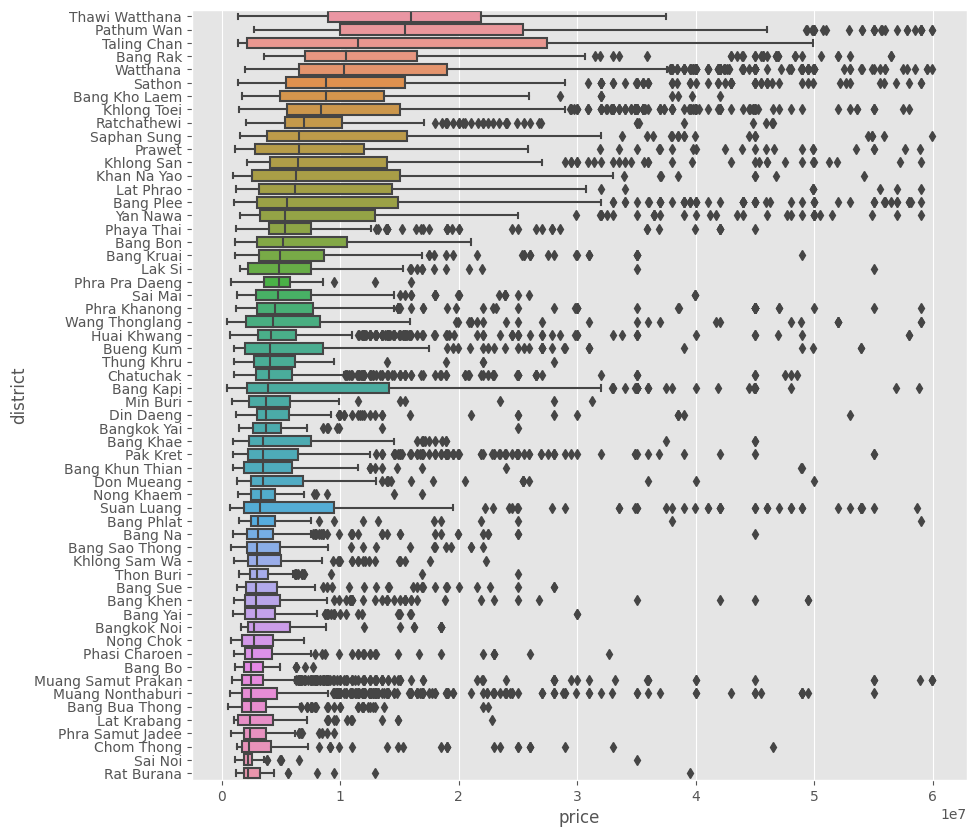

In [13]:
plt.figure(figsize=(10,10))
order = df.groupby('district')['price'].median().sort_values(ascending=False).index
sns.boxplot(x="price", y='district', data=df, order=order);



#### subdistricts

In [14]:
df.subdistrict.value_counts() # 249 unique subdistricts (too many to dummy up)

Khlong Tan Nuea          1120
Khlong Tan                661
Phra Khanong              584
Samrong Nuea              581
Huai Khwang               578
                         ... 
Wat Arun                    1
Khu Fang Nuea               1
Talat                       1
Ko Kret                     1
Whizdom The Exclusive       1
Name: subdistrict, Length: 249, dtype: int64

- some subdistrict names are invalid
- join with given table and check

In [15]:
district_df = pd.read_csv('data/bangkok_district.csv')
district_df

province    district     subdistrict
0        Bangkok    Bang Bon        Bang Bon
1        Bangkok   Bang Kapi         Hua Mak
2        Bangkok   Bang Kapi     Khlong Chan
3        Bangkok   Bang Khae       Bang Khae
4        Bangkok   Bang Khae  Bang Khae Nuea
..           ...         ...             ...
326  Pathum Tani  Thanyaburi     Bueng Sanan
327  Pathum Tani  Thanyaburi     Bueng Yitho
328  Pathum Tani  Thanyaburi    Lam Phak Kut
329  Pathum Tani  Thanyaburi    Prachathipat
330  Pathum Tani  Thanyaburi         Rangsit

[331 rows x 3 columns]

In [16]:
# no invalid name in district column

df[~df.district.isin(district_df.district)] 

Empty DataFrame
Columns: [id, province, district, subdistrict, address, property_type, total_units, bedrooms, baths, floor_area, floor_level, land_area, latitude, longitude, nearby_stations, nearby_station_distance, nearby_bus_stops, nearby_supermarkets, nearby_shops, year_built, month_built, facilities, price]
Index: []

[0 rows x 23 columns]

In [17]:
# subdistrict of some records are replaced with the name of the house 

df[~df.subdistrict.isin(district_df.subdistrict)] 

id province         district  \
6      10986308  Bangkok  Bang Khun Thian   
8      10959125  Bangkok  Bang Khun Thian   
12     10924939  Bangkok  Bang Khun Thian   
16     11017217  Bangkok  Bang Khun Thian   
17     11024739  Bangkok  Bang Khun Thian   
...         ...      ...              ...   
22040  10908947  Bangkok           Sathon   
22096  10951929  Bangkok        Din Daeng   
22164   8803155  Bangkok       Khlong San   
22232  11006502  Bangkok      Ratchathewi   
22312  10953249  Bangkok         Bang Rak   

                               subdistrict  \
6                       Smart Condo Rama 2   
8                       Smart Condo Rama 2   
12                      Smart Condo Rama 2   
16                      Smart Condo Rama 2   
17                      Smart Condo Rama 2   
...                                    ...   
22040                      The Met Sathorn   
22096  Lumpini Suite Dindaeng-Ratchaprarop   
22164                        Villa Sathorn   
22232                  Life Asoke - Rama 9   
22312                         ASHTON Silom   

                                            address property_type  \
6                     Soi Raksinphong,  Rama 2 Road         Condo   
8                     Soi Raksinphong,  Rama 2 Road         Condo   
12                    Soi Raksinphong,  Rama 2 Road         Condo   
16                    Soi Raksinphong,  Rama 2 Road         Condo   
17                    Soi Raksinphong,  Rama 2 Road         Condo   
...                                             ...           ...   
22040                        123 South Sathorn Road         Condo   
22096  ถนนดินแดง แขวงดินแดง เขตดินแดง กรุงเทพมหานคร         Condo   
22164                          5 KrungThonBuri Road         Condo   
22232                       626 Asoke-Dindaeng Road         Condo   
22312                                166 Silom Road         Condo   

       total_units  bedrooms  baths  floor_area  ...   longitude  \
6           2032.0       1.0    1.0          29  ...  100.427455   
8           2032.0       1.0    1.0          29  ...  100.427455   
12          2032.0       1.0    1.0          29  ...  100.427455   
16          2032.0       1.0    1.0          29  ...  100.427455   
17          2032.0       1.0    1.0          29  ...  100.427455   
...            ...       ...    ...         ...  ...         ...   
22040        370.0       2.0    2.0         125  ...  100.534107   
22096        491.0       1.0    1.0          24  ...  100.546395   
22164        636.0       1.0    1.0          53  ...  100.504384   
22232       2248.0       1.0    1.0          28  ...  100.563610   
22312        428.0       2.0    2.0          86  ...  100.526875   

       nearby_stations                            nearby_station_distance  \
6                    0                                               None   
8                    0                                               None   
12                   0                                               None   
16                   0                                               None   
17                   0                                               None   
...                ...                                                ...   
22040                3  [[B1 Sathorn BRT, 420], [S3 Chong Nonsi BTS, 4...   
22096                0                                               None   
22164                2  [[G1/S7 Krung Thon Buri BTS, 90], [G2 Charoen ...   
22232                3  [[BL20 Phra Ram 9 MRT, 340], [A6 Makkasan Airp...   
22312                3  [[S3 Chong Nonsi BTS, 480], [S4 Saint Louis BT...   

       nearby_bus_stops  nearby_supermarkets nearby_shops  year_built  \
6                  15.0                  5.0           11        2009   
8                  15.0                  5.0           11        2009   
12                 15.0                  5.0           11        2009   
16                 15.0                  5.0           1

#### `nearby_station_distance` is (pair of [station name, distance])

In [18]:
df.nearby_station_distance.head(10)

0     [[E9 On Nut BTS, 190], [E10 Bang Chak BTS, 880]]
1                                                 None
2                         [[E8 Phra Khanong BTS, 270]]
3    [[BL23 Queen Sirikit National Convention Centr...
4                            [[E12 Udom Suk BTS, 150]]
5                                                 None
6                                                 None
7                                                 None
8                                                 None
9                            [[E12 Udom Suk BTS, 150]]
Name: nearby_station_distance, dtype: object

In [19]:
# create new columns:  "closest_station_name" and "closest_station_distance"

def closest_station(station_list, return_value='station_name'):
    if type(station_list) != list:
        return None
    else:
        if return_value == 'station_name':
            return station_list[0][0]
        elif return_value == 'station_distance':
            return station_list[0][1]
        
df['closest_station_name'] = df.nearby_station_distance.apply(lambda x: closest_station(x, 'station_name'))
df['closest_station_distance'] = df.nearby_station_distance.apply(lambda x: closest_station(x, 'station_distance'))

print('with data :',  df.closest_station_name.notna().sum())
print('null :', df.closest_station_name.isna().sum())

df.head()

with data : 11819
null : 9831


id province      district   subdistrict                   address  \
0  10918106  Bangkok  Phra Khanong     Bang Chak       2097 Sukhumvit Road   
1  11007770  Bangkok  Phra Khanong     Bang Chak      Sukhumvit 101/1 Road   
2  10905108  Bangkok   Khlong Toei  Phra Khanong  4866-4878 Sukhumvit Road   
3  11007324  Bangkok   Khlong Toei   Khlong Toei    204-206 Sukhumvit Road   
4  10975023  Bangkok       Bang Na       Bang Na       2952 Sukhumvit Road   

  property_type  total_units  bedrooms  baths  floor_area  ...  \
0         Condo        940.0       1.0    1.0          30  ...   
1         Condo        347.0       1.0    1.0          24  ...   
2         Condo        383.0       1.0    1.0          42  ...   
3         Condo        140.0       2.0    2.0          70  ...   
4         Condo        421.0       2.0    2.0          63  ...   

                             nearby_station_distance  nearby_bus_stops  \
0   [[E9 On Nut BTS, 190], [E10 Bang Chak BTS, 880]]               NaN   
1                                               None               3.0   
2                       [[E8 Phra Khanong BTS, 270]]               NaN   
3  [[BL23 Queen Sirikit National Convention Centr...               NaN   
4                          [[E12 Udom Suk BTS, 150]]               NaN   

   nearby_supermarkets  nearby_shops  year_built month_built  \
0                  6.0            11        2013    December   
1                  7.0             5        2015    February   
2                 20.0            17        2015    February   
3                 13.0            20        2011        July   
4                 12.0            14        2011    February   

                                          facilities    price  \
0  [Car Park, Covered car park, CCTV, Fitness cor...  3590000   
1  [Car Park, Covered car park, CCTV, Fitness cor...  2200000   
2  [Car Park, CCTV, Gymnasium room, Lift lobby, S...  3800000   
3  [CCTV, Fitness corner, Playground, 24 hours se...  8000000   
4  [Car Park, Covered car park, CCTV, Fitness cor...  6300000   

                                closest_station_name  closest_station_distance  
0                                      E9 On Nut BTS                     190.0  
1                                               None                       NaN  
2                                E8 Phra Khanong BTS                     270.0  
3  BL23 Queen Sirikit National Convention Centre MRT                     580.0  
4                                   E12 Udom Suk BTS                     150.0  

[5 rows x 25 columns]

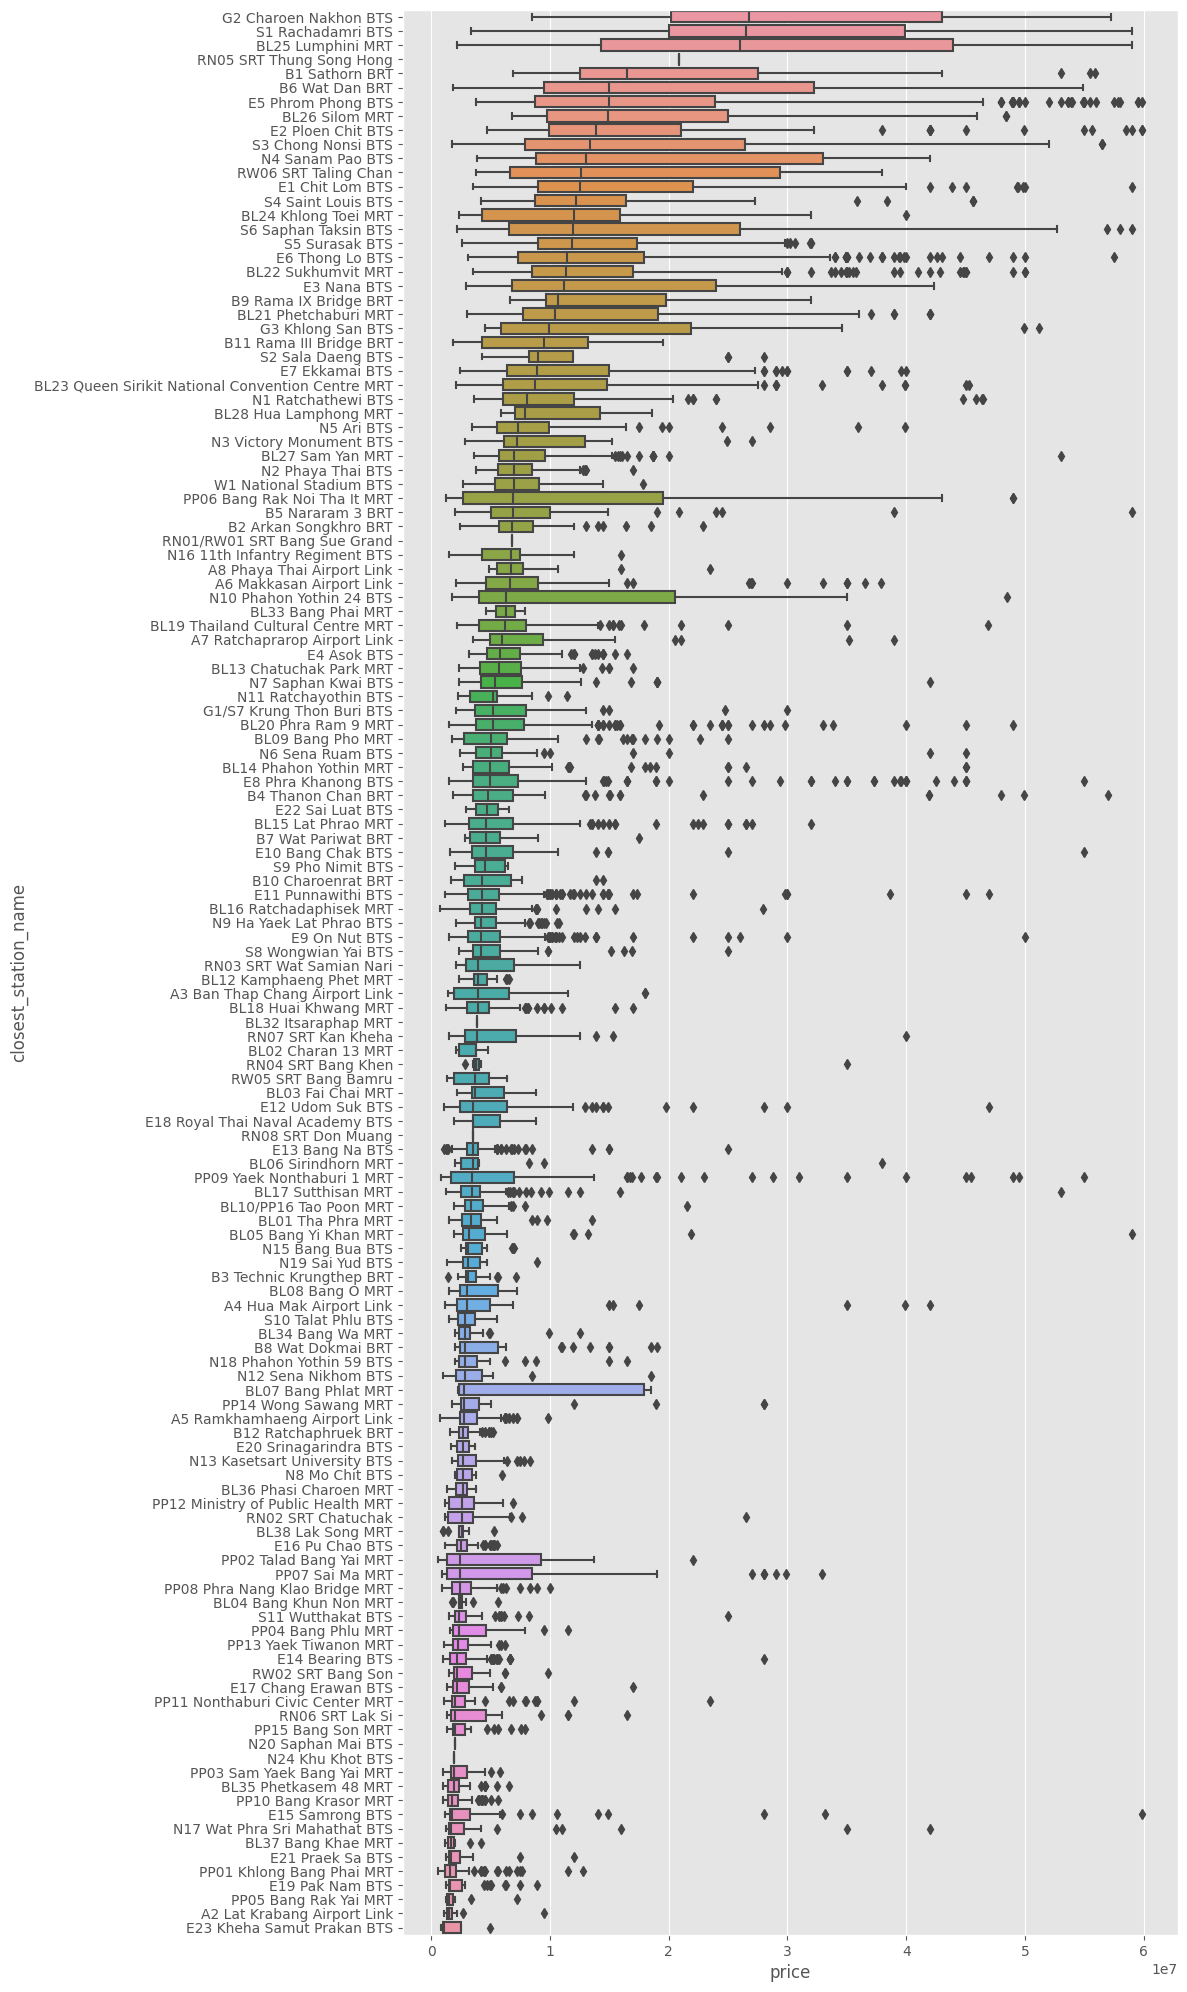

In [20]:
plt.figure(figsize=(10,25))
order = df.groupby('closest_station_name')['price'].median().sort_values(ascending=False).index
sns.boxplot(x="price", y='closest_station_name', data=df, order=order);

## scatter plots

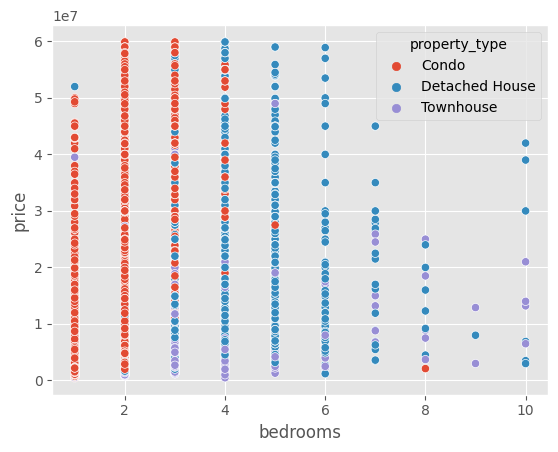

In [21]:
## bedrooms vs price - positive correlation
sns.scatterplot(y='price', x='bedrooms', hue='property_type', data=df);

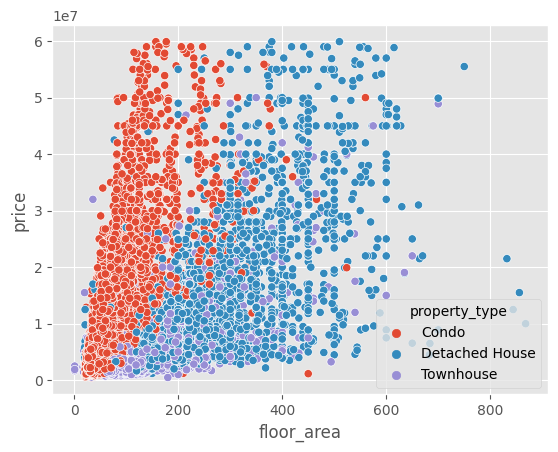

In [22]:
## floor area vs price - positive correlation
sns.scatterplot(y='price', x='floor_area', hue='property_type', data=df);

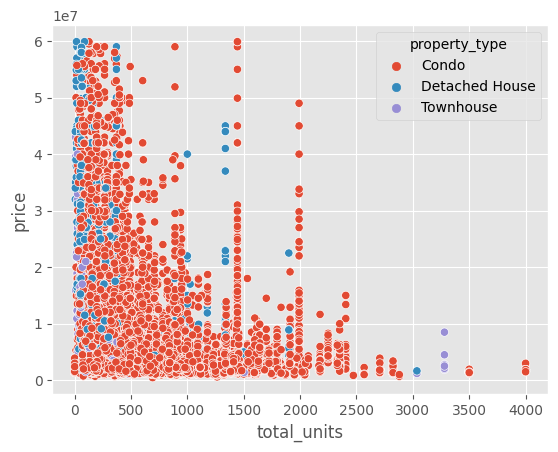

In [23]:
## total_units vs price - negative correleation
sns.scatterplot(y='price', x='total_units', hue='property_type', data=df);

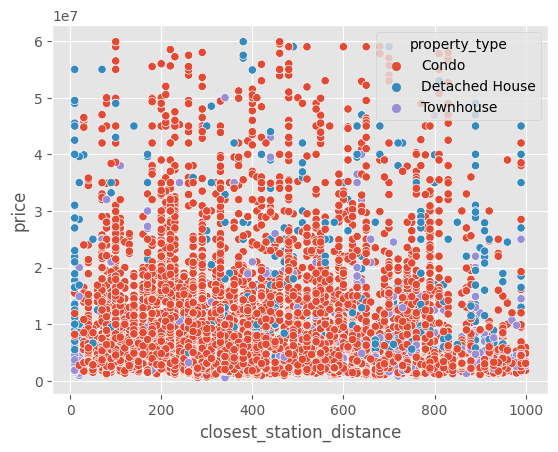

In [24]:
## closest station distance vs price - no correlation
sns.scatterplot(y='price', x='closest_station_distance', hue='property_type', data=df);

## map

In [25]:
fig = px.scatter_mapbox(
    data_frame=df.dropna(subset=['price']),
    lat="latitude",
    lon="longitude",
    hover_data=["price"],
    color="property_type",
    size="price",
    zoom=10,
    height=1000,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

# 3. Modelling

- use only 4 numeric columns : `bedrooms`, `baths`,  `floor_area`, `nearby_shops`
- and 2 categorical columns : `property_type`, `district`

In [26]:
feat_num = ['bedrooms', 'baths', 'floor_area', 'nearby_shops']
feat_cat = ['property_type', 'district']

dropped_df = df[feat_num + feat_cat + ['price']]

dropped_df.info() # non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21650 entries, 0 to 22315
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21650 non-null  float64
 1   baths          21650 non-null  float64
 2   floor_area     21650 non-null  int64  
 3   nearby_shops   21650 non-null  int64  
 4   property_type  21650 non-null  object 
 5   district       21650 non-null  object 
 6   price          21650 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.8+ MB


In [27]:
X = pd.get_dummies(dropped_df[feat_num + feat_cat], columns=feat_cat, drop_first=True)
y = dropped_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17320, 63)
(4330, 63)
(17320,)
(4330,)


## 3.1 simple linear regression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print("R2 Score of train :",  lr.score(X_train, y_train))
print("R2 Score of test  :",  lr.score(X_test, y_test))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train)**0.5)
print("RMSE of test  :", mean_squared_error(y_test, pred_test)**0.5)

R2 Score of train : 0.6418558890545082
R2 Score of test  : 0.6578442843827845

RMSE of train : 5623961.331120725
RMSE of test  : 5683998.220075022


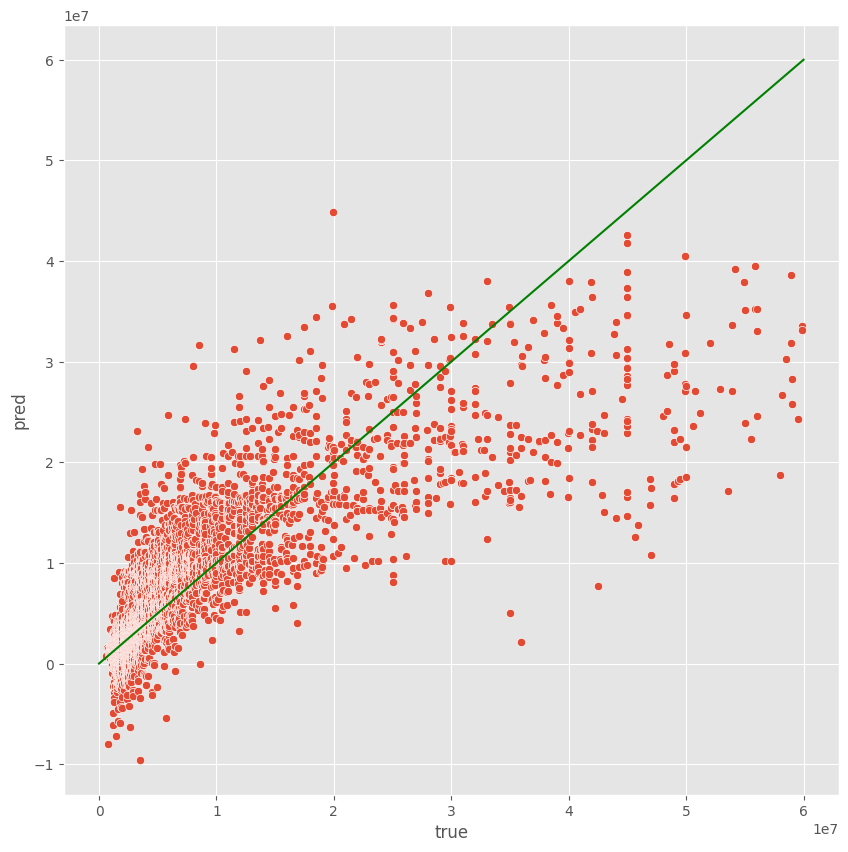

In [29]:
## true vs pred scattaer plot
## some of predict values become native 

df_result = pd.DataFrame({'true':y_test, 'pred':pred_test})
df_result['residual'] = df_result['pred'] - df_result['true']
df_result = df_result.sort_values('true')

plt.figure(figsize=(10,10))
sns.scatterplot(y='pred', x='true', data=df_result)
plt.plot(np.linspace(0, 6e7, 100), np.linspace(0, 6e7, 100), color='green')

plt.xlabel('true')
plt.ylabel('pred')
plt.show()

#### residual plot

- it does not meet "Normality"

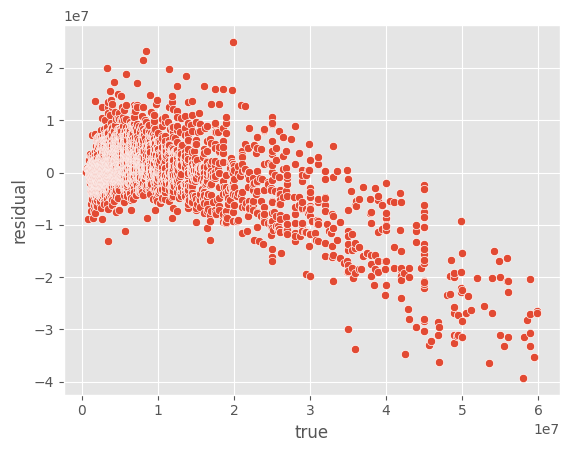

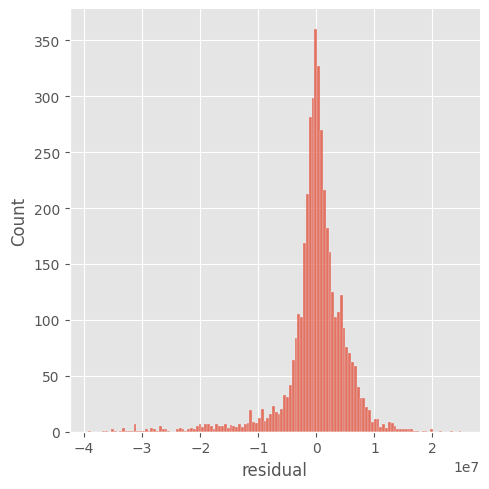

In [30]:
sns.scatterplot(x='true', y='residual', data=df_result)
sns.displot(x='residual', data=df_result);

## 3.2 log transformation for target value -> linear regression

In [31]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)
pred_train_log = np.exp(lr_log.predict(X_train))
pred_test_log = np.exp(lr_log.predict(X_test))

print("R2 Score of train :",  lr_log.score(X_train, y_train_log))
print("R2 Score of test  :",  lr_log.score(X_test, y_test_log))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train_log)**0.5)
print("RMSE of test  :", mean_squared_error(y_test, pred_test_log)**0.5)

R2 Score of train : 0.7791107422749906
R2 Score of test  : 0.7834885061325649

RMSE of train : 6230199.929336122
RMSE of test  : 6720881.099372595


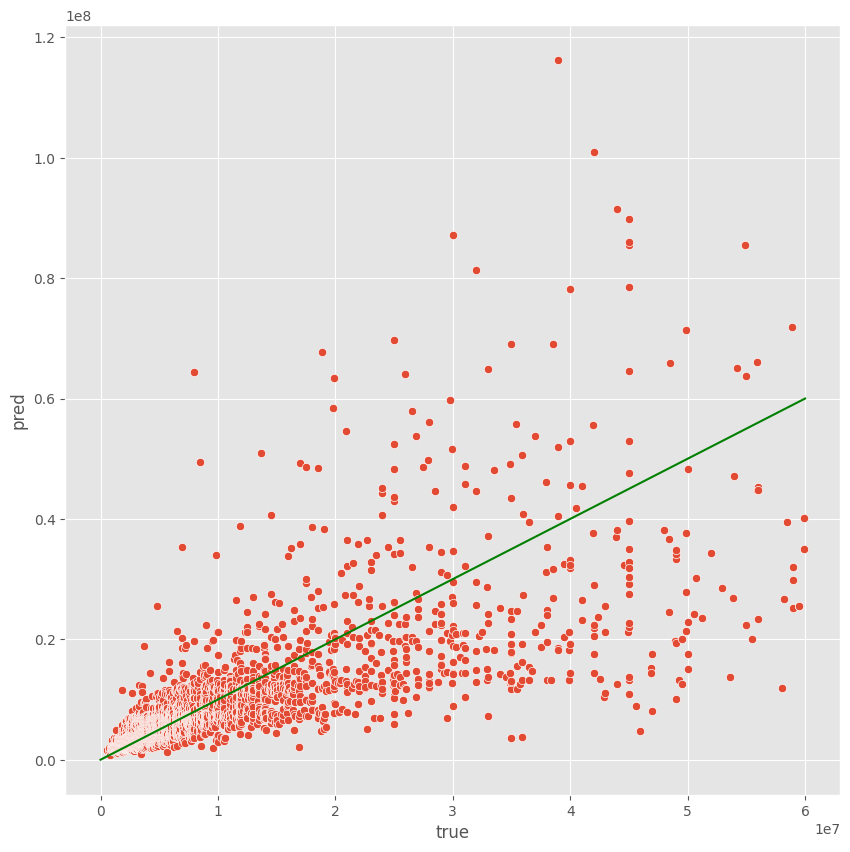

In [32]:
## true vs pred scattaer plot

df_result_log = pd.DataFrame({'true':y_test, 'pred':pred_test_log})
df_result_log['residual'] = df_result_log['pred'] - df_result_log['true']
df_result_log = df_result_log.sort_values('true')

plt.figure(figsize=(10,10))
sns.scatterplot(y='pred', x='true', data=df_result_log)
plt.plot(np.linspace(0, 6e7, 100), np.linspace(0, 6e7, 100), color='green')

plt.xlabel('true')
plt.ylabel('pred')
plt.show()

#### residual plot

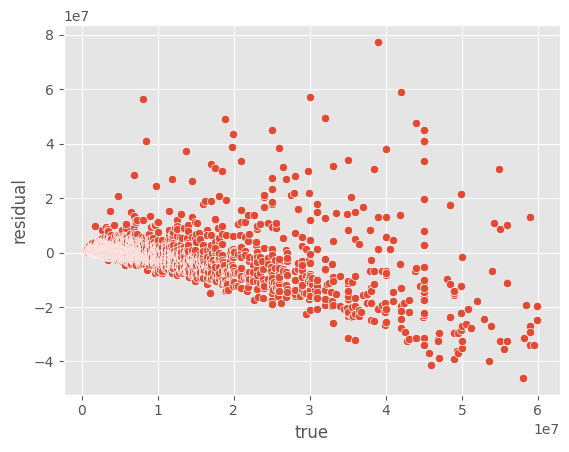

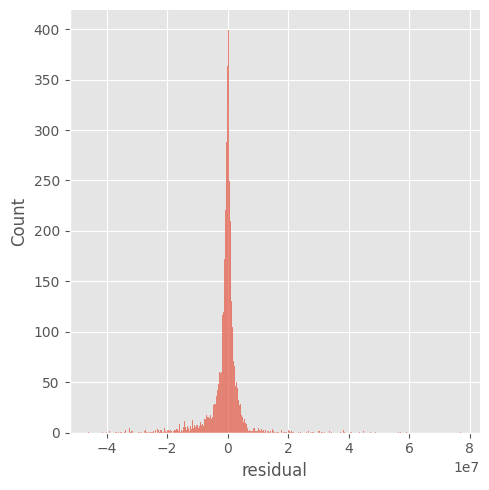

In [33]:
sns.scatterplot(x='true', y='residual', data=df_result_log)
sns.displot(x='residual', data=df_result_log);

## 3.3 Polynomial Feature + log transformation

In [34]:
poly = PolynomialFeatures(2)

X_new = np.concatenate([poly.fit_transform(dropped_df[feat_num]), pd.get_dummies(df[feat_cat], drop_first=True)], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(17320, 74)
(4330, 74)
(17320,)
(4330,)


In [35]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)
pred_train_log = np.exp(lr_log.predict(X_train))
pred_test_log = np.exp(lr_log.predict(X_test))

print("R2 Score of train :",  lr_log.score(X_train, y_train_log))
print("R2 Score of test  :",  lr_log.score(X_test, y_test_log))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train_log)**0.5)
print("RMSE of test  :", mean_squared_error(y_test, pred_test_log)**0.5)

R2 Score of train : 0.8124734814346957
R2 Score of test  : 0.8138541163571058

RMSE of train : 5683952.198727675
RMSE of test  : 5868513.99611441


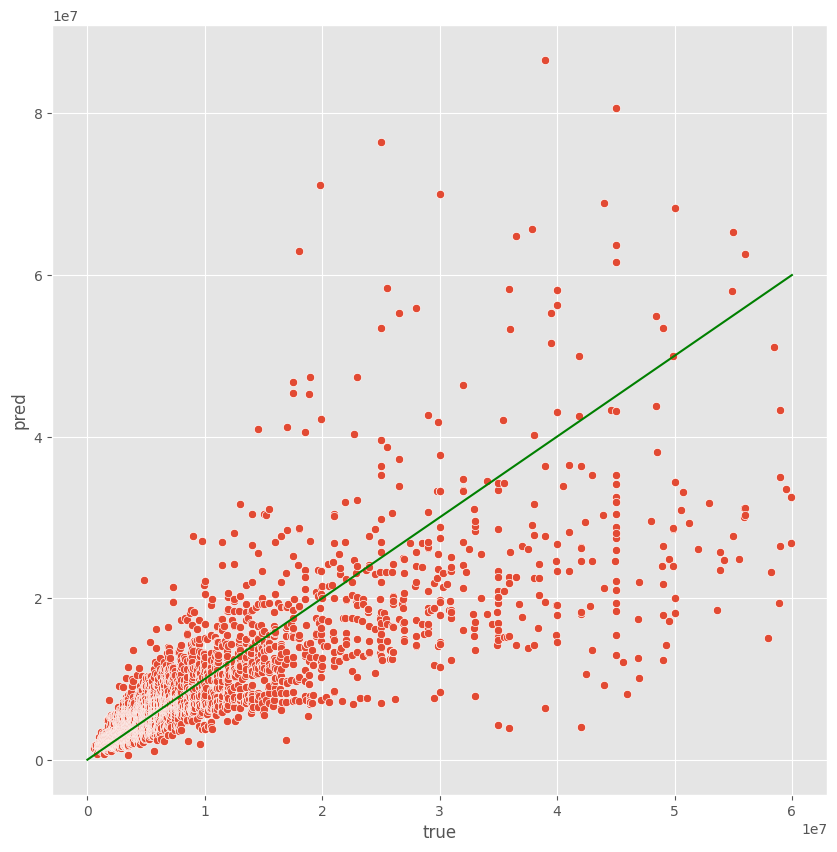

In [36]:
## true vs pred scattaer plot

df_result_log = pd.DataFrame({'true':y_test, 'pred':pred_test_log})
df_result_log['residual'] = df_result_log['pred'] - df_result_log['true']
df_result_log = df_result_log.sort_values('true')

plt.figure(figsize=(10,10))
sns.scatterplot(y='pred', x='true', data=df_result_log)
plt.plot(np.linspace(0, 6e7, 100), np.linspace(0, 6e7, 100), color='green')

plt.xlabel('true')
plt.ylabel('pred')
plt.show()

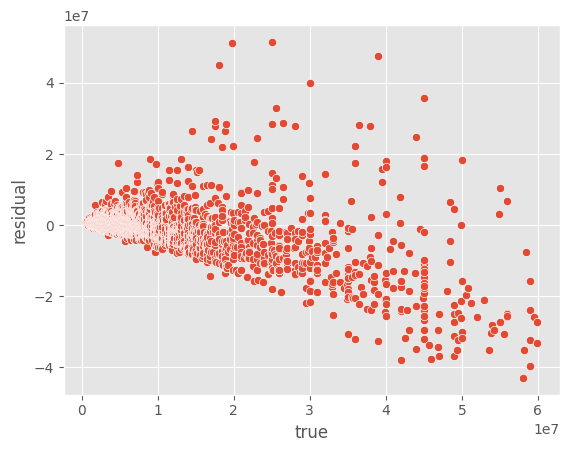

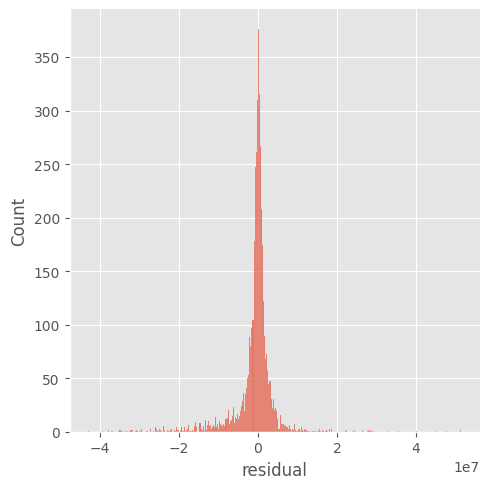

In [37]:
sns.scatterplot(x='true', y='residual', data=df_result_log)
sns.displot(x='residual', data=df_result_log);